In [96]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Load the IMDB dataset

In [97]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [98]:
print("train_data:")
print(train_data[0])
print("train_labels:")
print(train_labels)

train_data:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels:
[1 0 0 ... 0 1 0]


# Data analysis

In [99]:
x = train_data
print("Training Data:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = train_labels
print("Training Labels:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = test_data
print("Test Data:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = test_labels
print("Test Labels:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')

Training Data: 1 D Tensor, 25000 samples, object data type.
Training Labels: 1 D Tensor, 25000 samples, int64 data type.
Test Data: 1 D Tensor, 25000 samples, object data type.
Test Labels: 1 D Tensor, 25000 samples, int64 data type.


# Preparing our data

In [100]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train:", x_train)

y_train = np.asarray(train_labels).astype('float32')
print("y_train:", y_train)
y_test = np.asarray(test_labels).astype('float32')
print("y_test:", y_test)

x_train: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
y_train: [1. 0. 0. ... 0. 1. 0.]
y_test: [0. 1. 1. ... 0. 0. 0.]


# Decoding one review back to english


In [101]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [102]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Training the model

In [103]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [104]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [105]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.5619 - binary_accuracy: 0.7689 - val_loss: 0.4479 - val_binary_accuracy: 0.8692
Epoch 2/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3549 - binary_accuracy: 0.8973 - val_loss: 0.3341 - val_binary_accuracy: 0.8854
Epoch 3/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.2511 - binary_accuracy: 0.9247 - val_loss: 0.2886 - val_binary_accuracy: 0.8925
Epoch 4/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1948 - binary_accuracy: 0.9375 - val_loss: 0.2761 - val_binary_accuracy: 0.8923
Epoch 5/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1561 - binary_accuracy: 0.9502 - val_loss: 0.2750 - val_binary_accuracy: 0.8889
Epoch 6/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.1310 - binary_accuracy: 0.9603 - val_loss: 0.2873 - val_binary_

In [106]:
history_dict=history.history
#print(history.history)
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

# Pedictions on new data

In [107]:
model.predict(x_test)

array([[0.00543506],
       [1.        ],
       [0.99082446],
       ...,
       [0.00176966],
       [0.01441411],
       [0.7073525 ]], dtype=float32)

In [108]:
result = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(result)

25000/25000 [==============================] - 1s 51us/step
['loss', 'binary_accuracy']
[0.7088216743278504, 0.8496]


In [109]:
history_dict = history.history
print(history_dict.keys())



dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


# Training and validation loss plot

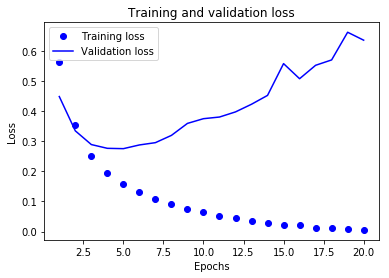

In [110]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Training and validation accuracy plot

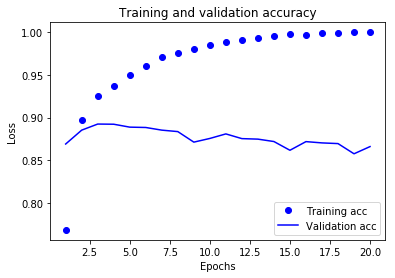

In [111]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values , 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()